### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv


### Dataset Reading

In [2]:
df = pd.read_csv('/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv')

In [3]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,22/23,Saudi Pro League,16,2/9/23,A,Al-Nassr FC,Al-Wehda FC,0:4,CF,61,0:4,Right-footed shot,NaN
706,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,18,0:1,Penalty,\t
707,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,23,0:2,Left-footed shot,Sultan Al-Ghannam
708,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,44,0:3,Counter attack goal,Ayman Yahya


In [4]:
df.shape

(710, 13)

In [5]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [6]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [7]:
df.tail()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
705,22/23,Saudi Pro League,16,2/9/23,A,Al-Nassr FC,Al-Wehda FC,0:4,CF,61,0:4,Right-footed shot,NaN
706,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,18,0:1,Penalty,\t
707,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,23,0:2,Left-footed shot,Sultan Al-Ghannam
708,22/23,Saudi Pro League,18,2/25/23,A,Al-Nassr FC,Damac FC,0:3,CF,44,0:3,Counter attack goal,Ayman Yahya
709,22/23,Saudi Pro League,21,3/18/23,H,Al-Nassr FC,Abha Club,2:1,CF,78,1:1,Direct free kick,NaN


In [8]:
df.sample(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
596,18/19,UEFA Champions League,last 16,03-12-19,H,Juventus FC,Atletico de Madrid,3:00,CF,86,3:00,Penalty,NaN
168,10/11,Copa del Rey,4th round,11-10-10,H,Real Madrid,Real Murcia CF,5:01,NaN,76,3:00,Left-footed shot,Angel Di Maria
633,19/20,Serie A,34,7/20/20,H,Juventus FC,SS Lazio,2:01,LW,51,1:00,Penalty,NaN
202,10/11,LaLiga,36,05-10-11,H,Real Madrid,Getafe CF,4:00,LW,23,1:00,Header,Mesut Ozil
568,17/18,LaLiga,31,04-08-18,H,Real Madrid,Atletico de Madrid,1:01,CF,53,1:00,Right-footed shot,Gareth Bale


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            710 non-null    object
 1   Competition       710 non-null    object
 2   Matchday          710 non-null    object
 3   Date              710 non-null    object
 4   Venue             710 non-null    object
 5   Club              710 non-null    object
 6   Opponent          710 non-null    object
 7   Result            710 non-null    object
 8   Playing_Position  652 non-null    object
 9   Minute            710 non-null    object
 10  At_score          710 non-null    object
 11  Type              695 non-null    object
 12  Goal_assist       464 non-null    object
dtypes: object(13)
memory usage: 72.2+ KB


In [10]:
df.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,710,710,710,710,710,710,710,710,652,710,710,695,464
unique,21,17,52,468,2,5,129,57,5,106,43,11,91
top,14/15,LaLiga,Group Stage,09-12-15,H,Real Madrid,Sevilla FC,3:00,LW,90,1:00,Right-footed shot,Karim Benzema
freq,61,311,75,5,404,450,27,49,356,17,111,253,44


### Data Cleaning & Exploring Fields

In [11]:
df.duplicated().sum()

0

##### Good to see that dataset doesn't have any duplicate values

In [12]:
df.isna().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         246
dtype: int64

##### We need to treat these null values

In [13]:
df['Playing_Position'].value_counts(dropna = False)

LW     356
CF     209
RW      79
NaN     58
LW       5
CF       3
Name: Playing_Position, dtype: int64

In [14]:
df['Playing_Position'] = df['Playing_Position'].apply(lambda x: str(x).strip())

In [15]:
df['Playing_Position'].value_counts(dropna = False)

LW     361
CF     212
RW      79
nan     58
Name: Playing_Position, dtype: int64

In [16]:
mode_playing_position = df['Playing_Position'].mode()[0]
mode_playing_position

'LW'

In [17]:
df['Playing_Position'] = df['Playing_Position'].replace('nan',mode_playing_position)

In [18]:
df['Playing_Position'].value_counts()

LW    419
CF    212
RW     79
Name: Playing_Position, dtype: int64

We have treated null values for field 'Playing_Position'

In [19]:
df['Type'].value_counts()

Right-footed shot         253
Penalty                   132
Left-footed shot          113
Header                    112
Direct free kick           49
Tap-in                     14
Long distance kick          9
Counter attack goal         6
Penalty rebound             3
Solo run                    2
Deflected shot on goal      2
Name: Type, dtype: int64

In [20]:
mode_type = df['Type'].mode()[0]
mode_type

'Right-footed shot'

In [21]:
df['Type'].fillna(mode_type, inplace=True)

In [22]:
df['Type'].isna().sum()

0

We have treated null values for field 'Type'

In [23]:
df['Goal_assist'].nunique()

91

In [24]:
df['Goal_assist'].unique()

array([nan, 'Rui Jorge', 'Carlos Martins', 'Cesar Prates', 'Ryan Giggs',
       'Gary Neville', 'Paul Scholes', 'Louis Saha',
       'Ruud van Nistelrooy', 'Roy Keane', 'Wayne Rooney', 'John OShea',
       'Ji-sung Park', 'Ole Gunnar Solskjaer', 'Michael Carrick',
       'Wes Brown', 'Patrice Evra', 'Carlos Tevez', 'Nemanja Vidicâ€Ž',
       'Nani', 'Edwin van der Sar', 'Owen Hargreaves', 'Dimitar Berbatov',
       'Anderson', 'Guti', 'Esteban Granero', 'Pepe', 'Karim Benzema',
       'Gonzalo Higuain', 'Lassana Diarra', 'Ezequiel Garay', 'Kaka',
       'Marcelo', 'Sergio Ramos', 'Mesut Ozil', 'Xabi Alonso',
       'Angel Di Maria', 'Sergio Canales', 'Sami Khedira',
       'alvaro Arbeloa', 'Fabio CoentrÃ£o', 'Jose CallejÃ³n',
       'Luka Modric', 'Isco', 'Gareth Bale', 'Daniel Carvajal',
       'James Rodriguez', 'Toni Kroos', 'Chicharito', 'Lucas Vazquez',
       'Danilo', 'Jese', 'alvaro Morata', 'Nacho Fernandez',
       'Mateo Kovacic', 'Marco Asensio', 'Casemiro', 'Borja Mayoral

In [25]:
df['Goal_assist'].value_counts(dropna = False).head(2)

NaN              246
Karim Benzema     44
Name: Goal_assist, dtype: int64

In [26]:
str = 'No Assist'
df['Goal_assist'].fillna(str, inplace=True)

In [27]:
df['Goal_assist'].value_counts(dropna = False).head(2)

No Assist        246
Karim Benzema     44
Name: Goal_assist, dtype: int64

In [28]:
df.isna().sum()

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

##### Good to see that we have successfully treated all null values

In [29]:
df.Season.value_counts()

14/15     61
11/12     60
Dec-13    55
10/11     53
13/14     51
15/16     51
17/18     44
07/08     42
16/17     42
19/20     37
20/21     36
09/10     33
18/19     28
08/09     26
21/22     24
06/07     23
22/23     12
05/06     12
04/05      9
03/04      6
02/03      5
Name: Season, dtype: int64

We need to replace 'Dec-13' here

In [30]:
df.Season = df['Season'].replace('Dec-13','12/13')

In [31]:
df[df['Season'] == 'Dec-13'].any().sum()

0

In [32]:
df['Minute'].unique()

array(['34', '90+5', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '45+1', '21', '76', '63', '90', '12',
       '68', '14', '38', '45', '59', '23', '19', '73', '82', '10', '39',
       '84', '85', '47', '50', '77', '49', '28', '5', '62', '51', '41',
       '35', '90+3', '22', '81', '48', '70', '90+2', '69', '56', '79',
       '16', '53', '3', '24', '32', '26', '25', '30', '43', '65', '11',
       '6', '57', '61', '17', '27', '1', '75', '2', '64', '71', '18',
       '78', '29', '36', '15', '55', '86', '90+1', '72', '20', '42',
       '103', '46', '52', '90+4', '37', '66', '90+6', '31', '40', '120',
       '83', '7', '33', '97', '104', '105', '109', '90+7', '45+7', '45+2'],
      dtype=object)

In [33]:
def clean_minute(minute_str):
    if '+' in minute_str:
        main_minute, extra_minute = minute_str.split('+')
        return int(main_minute) + int(extra_minute)
    elif minute_str == '45+1':
        return 46
    else:
        return int(minute_str)

df['Cleaned_Minute'] = df['Minute'].apply(clean_minute)

In [34]:
df['Cleaned_Minute'].unique()

array([ 34,  95,  88,  67,  13,  80,  74,  89,  60,   4,  44,  87,   9,
         8,  54,  58,  46,  21,  76,  63,  90,  12,  68,  14,  38,  45,
        59,  23,  19,  73,  82,  10,  39,  84,  85,  47,  50,  77,  49,
        28,   5,  62,  51,  41,  35,  93,  22,  81,  48,  70,  92,  69,
        56,  79,  16,  53,   3,  24,  32,  26,  25,  30,  43,  65,  11,
         6,  57,  61,  17,  27,   1,  75,   2,  64,  71,  18,  78,  29,
        36,  15,  55,  86,  91,  72,  20,  42, 103,  52,  94,  37,  66,
        96,  31,  40, 120,  83,   7,  33,  97, 104, 105, 109])

In [35]:
df.Competition.value_counts()

LaLiga                              311
UEFA Champions League               140
Premier League                      103
Serie A                              81
Copa del Rey                         22
FA Cup                               13
Saudi Pro League                      9
FIFA Club World Cup                   7
EFL Cup                               4
Supercopa                             4
Italy Cup                             4
Liga Portugal                         3
Taca de Portugal Placard              2
UEFA Super Cup                        2
Supercoppa Italiana                   2
Europa League                         2
UEFA Champions League Qualifying      1
Name: Competition, dtype: int64

In [36]:
df.Matchday.value_counts()

Group Stage       75
last 16           34
Quarter-Finals    31
Semi-Finals       26
29                20
18                19
6                 18
23                18
8                 18
20                17
13                16
37                16
Final             16
12                15
22                15
27                15
35                15
21                15
25                15
3                 14
28                14
14                14
16                14
15                14
31                13
9                 13
24                13
36                13
38                13
17                13
10                13
34                12
11                12
30                11
4                 11
19                10
26                10
33                10
5                  9
32                 8
7                  8
2                  7
1                  6
Fifth Round        4
final              4
Third Round        3
Fourth Round       3
Sixth Round  

In [37]:
matchday_mapping = {
    'Group Stage': 'Group Stage',
    'last 16': 'Round of 16',
    'Quarter-Finals': 'Quarter-Finals',
    'Semi-Finals': 'Semi-Finals',
    'Fifth Round': 'Fifth Round',
    'Final': 'Final',
    'final': 'Final',
    'Third Round': 'Third Round',
    'Fourth Round': 'Fourth Round',
    'Sixth Round': 'Sixth Round',
    '4th round': 'Fourth Round',
    '6th round': 'Sixth Round',
    '3rd round': 'Third Round',
    'Round of 16': 'Round of 16',
}

df['Matchday'] = df['Matchday'].map(matchday_mapping)

In [38]:
df.Matchday.value_counts(dropna = False)

NaN               507
Group Stage        75
Round of 16        35
Quarter-Finals     31
Semi-Finals        26
Final              20
Fourth Round        5
Fifth Round         4
Third Round         4
Sixth Round         3
Name: Matchday, dtype: int64

In [39]:
str = 'Others'
df.Matchday.fillna(str, inplace = True)

In [40]:
df.Matchday.value_counts(dropna = False)

Others            507
Group Stage        75
Round of 16        35
Quarter-Finals     31
Semi-Finals        26
Final              20
Fourth Round        5
Fifth Round         4
Third Round         4
Sixth Round         3
Name: Matchday, dtype: int64

'Matchday field look good now

In [41]:
df["Date"].nunique()

468

In [42]:
df["Date"].unique()

array(['10-07-02', '10/26/02', '11/24/02', '12/18/02', '11-01-03',
       '2/14/04', '3/20/04', '04-10-04', '5/15/04', '5/22/04', '12-04-04',
       '1/19/05', '1/22/05', '02-01-05', '2/19/05', '03-12-05', '3/19/05',
       '4/17/05', '08-09-05', '10/29/05', '11/30/05', '12/31/05',
       '02-04-06', '02-11-06', '2/26/06', '03-06-06', '05-07-06',
       '8/20/06', '9/23/06', '10/28/06', '11-04-06', '11/29/06',
       '12-09-06', '12/23/06', '12/26/06', '12/30/06', '1/13/07',
       '1/31/07', '02-03-07', '2/24/07', '03-10-07', '3/19/07',
       '04-10-07', '4/14/07', '4/24/07', '05-05-07', '9/19/07', '9/29/07',
       '10-06-07', '10/23/07', '11-03-07', '11-07-07', '11-11-07',
       '11/27/07', '12-03-07', '12-08-07', '12/23/07', '12/26/07',
       '12/29/07', '01-05-08', '01-12-08', '1/19/08', '1/27/08',
       '1/30/08', '2/23/08', '03-04-08', '3/15/08', '3/19/08', '3/23/08',
       '3/29/08', '04-01-08', '04-06-08', '4/13/08', '05-03-08',
       '05-11-08', '5/21/08', '9/23/08', '9

In [43]:
df.Date = pd.to_datetime(df.Date)

In [44]:
df['Venue'].value_counts()

H    404
A    306
Name: Venue, dtype: int64

In [45]:
df['Club'].value_counts()

Real Madrid          450
Manchester United    145
Juventus FC          101
Al-Nassr FC            9
Sporting CP            5
Name: Club, dtype: int64

In [46]:
df['Opponent'].nunique()

129

In [47]:
df['Opponent'].unique()

array(['Moreirense FC', 'Boavista FC', 'CD Estarreja',
       'FC Oliveira do Hospital', 'Portsmouth FC', 'Manchester City',
       'Tottenham Hotspur', 'Birmingham City', 'Aston Villa',
       'Millwall FC', 'Southampton FC', 'Exeter City', 'Arsenal FC',
       'Everton FC', 'Fulham FC', 'Newcastle United', 'Debreceni VSC',
       'Middlesbrough FC', 'West Bromwich Albion', 'Bolton Wanderers',
       'Wigan Athletic', 'Charlton Athletic', 'Reading FC', 'Watford FC',
       'AS Roma', 'AC Milan', 'Sporting CP', 'Dynamo Kyiv',
       'Blackburn Rovers', 'Derby County', 'Sunderland AFC',
       'West Ham United', 'Olympique Lyon', 'Liverpool FC', 'Chelsea FC',
       'Hull City', 'Stoke City', 'Gamba Osaka', 'FC Internazionale',
       'FC Porto', 'Deportivo de La CoruÃ±a', 'RCD Espanyol Barcelona',
       'FC ZÃ¼rich', 'Xerez CD', 'Villarreal CF', 'Olympique Marseille',
       'UD Almeria', 'Real Zaragoza', 'Malaga CF', 'CD Tenerife',
       'Sevilla FC', 'Real Valladolid CF', 'Getafe C

In [48]:
df['Result'].unique()

array(['3:00', '1:02', '4:01', '8:01', '4:02', '0:02', '3:01', '2:04',
       '0:04', '1:00', '1:04', '1:03', '4:00', '5:01', '1:01', '0:03',
       '3:02', '2:02', '7:01', '0:01', '2:00', '2:01', '6:00', '1:05',
       '6:5 on pens', '4:03', '5:00', '3:05', '0:05', '5:02', '2:05',
       '6:02', '6:01', '8:00', '2:03', '7:00', '0:1 AET', '2:06', '0:06',
       '3:4 on pens', '2:1 AET', '1:06', '7:03', '3:04', '4:1 AET',
       '2:08', '9:01', '10:02', '4:2 AET', '3:03', '6:03', '1:2', '3:0',
       '2:2', '0:4', '0:3', '2:1'], dtype=object)

In [49]:
df[['result_home','result_away']] = df.Result.str.split(':',expand=True)

In [50]:
df.result_home = df.result_home.astype(int)
df.result_away = df.result_away.str.extract('(\d+)').astype(int)

In [51]:
df['result_home'].unique()

array([ 3,  1,  4,  8,  0,  2,  5,  7,  6,  9, 10])

In [52]:
df['result_away'].unique()

array([0, 2, 1, 4, 3, 5, 6, 8])

In [53]:
def check_winner(row):
    if row['result_home'] > row['result_away']:
        return 'H'
    elif row['result_home'] == row['result_away']:
        return 'Draw'
    else:
        return 'A'
    
df['winner'] = df.apply(check_winner,axis=1)

In [54]:
def did_cr7_win(row):
    if row['Venue'] == row['winner']:
        return 'win'
    else:
        return 'lose'

df['cr7_win'] = df.apply(did_cr7_win,axis=1)
df['cr7_win'] = df['cr7_win'].map({'win':1,'lose':0})

In [55]:
def venue_win(row):
    if row['Venue'] == row['winner']:
        return row['winner']
    else:
        return row['winner']
    
df['venue_win'] = df.apply(venue_win,axis=1)

In [56]:
df['Year'] = df['Date'].dt.year

In [57]:
df.sample(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Cleaned_Minute,result_home,result_away,winner,cr7_win,venue_win,Year
129,09/10,LaLiga,Others,2009-09-23,A,Real Madrid,Villarreal CF,0:02,CF,2,0:01,Right-footed shot,No Assist,2,0,2,A,1,A,2009
163,10/11,LaLiga,Others,2010-10-23,H,Real Madrid,Racing Santander,6:01,LW,26,3:00,Left-footed shot,Mesut Ozil,26,6,1,H,1,H,2010
485,15/16,LaLiga,Others,2016-05-14,A,Real Madrid,Deportivo de La CoruÃ±a,0:02,LW,8,0:01,Left-footed shot,Karim Benzema,8,0,2,A,1,A,2016
84,07/08,UEFA Champions League,Round of 16,2008-03-04,H,Manchester United,Olympique Lyon,1:00,RW,41,1:00,Left-footed shot,No Assist,41,1,0,H,1,H,2008
216,11/12,LaLiga,Others,2011-09-24,H,Real Madrid,Rayo Vallecano,6:02,LW,84,6:02,Penalty,No Assist,84,6,2,H,1,H,2011


##### Now Data look awesome. So, let's start our analyis

### Analysis

#### Count of Goals by Competition

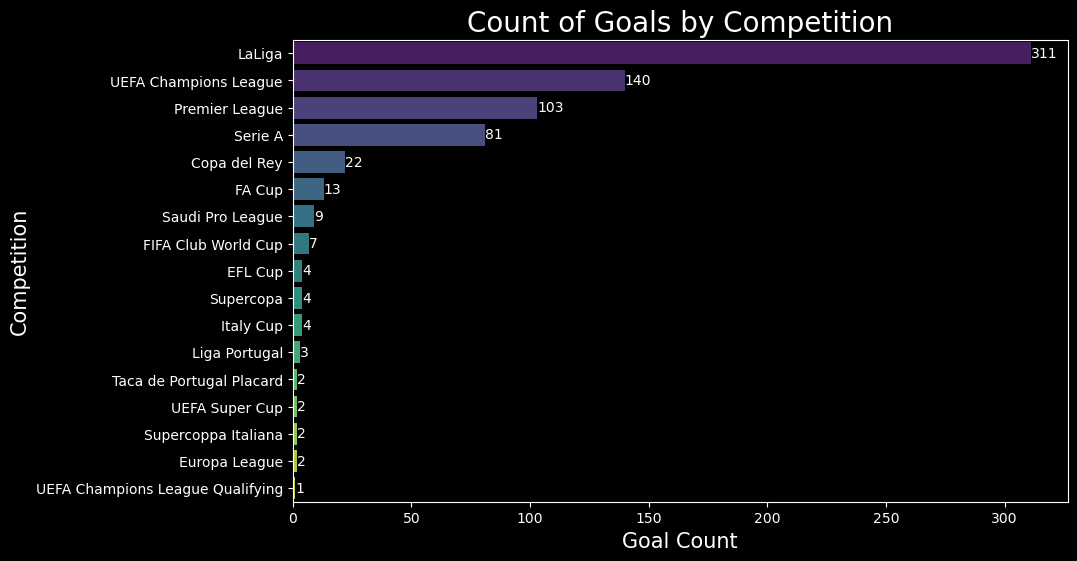

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Competition', palette="viridis", order=df['Competition'].value_counts().index)
plt.title("Count of Goals by Competition", fontsize=20)
plt.ylabel("Competition", fontsize=15)
plt.xlabel("Goal Count", fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars)

Ronaldo has scored more goals in LaLiga

#### Count of Matches by Matchday

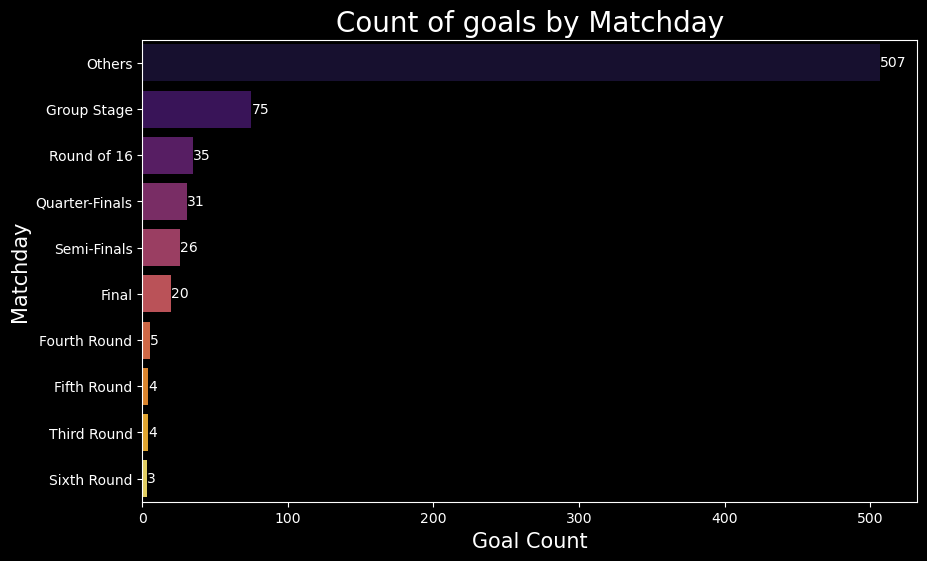

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Matchday', palette="inferno", order=df['Matchday'].value_counts().index)
plt.title("Count of goals by Matchday", fontsize=20)
plt.ylabel("Matchday", fontsize=15)
plt.xlabel("Goal Count", fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars)

#### Distribution of Match Outcomes by Venue

([<matplotlib.patches.Wedge at 0x7f85b194aa70>,
 [Text(-1.0742465278938809, -0.23663135318030393, 'H'),
  Text(1.0742465278938809, 0.23663135318030382, 'A')],
 [Text(-0.5859526515784804, -0.12907164718925668, '56.9%'),
  Text(0.5859526515784804, 0.12907164718925662, '43.1%')])

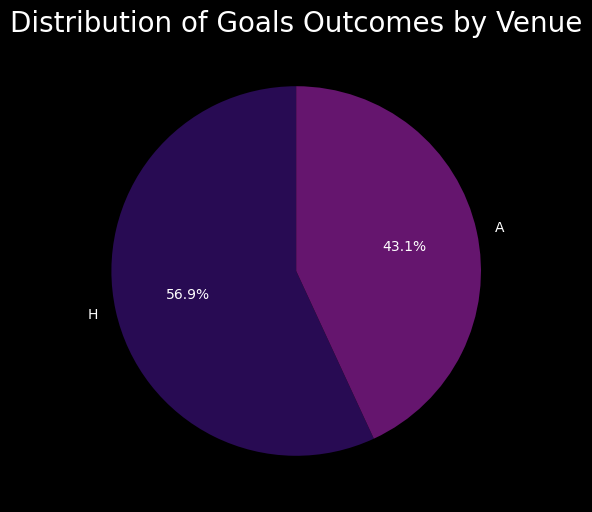

In [60]:
venue_counts = df['Venue'].value_counts()

plt.figure(figsize=(6, 6))
plt.title("Distribution of Goals Outcomes by Venue", fontsize=20)
plt.pie(venue_counts, labels=venue_counts.index, autopct='%1.1f%%', colors=sns.color_palette("inferno"), startangle=90)

Ronaldo has played almost same number of goals in both home and away conditions

#### Count of Goals by Club

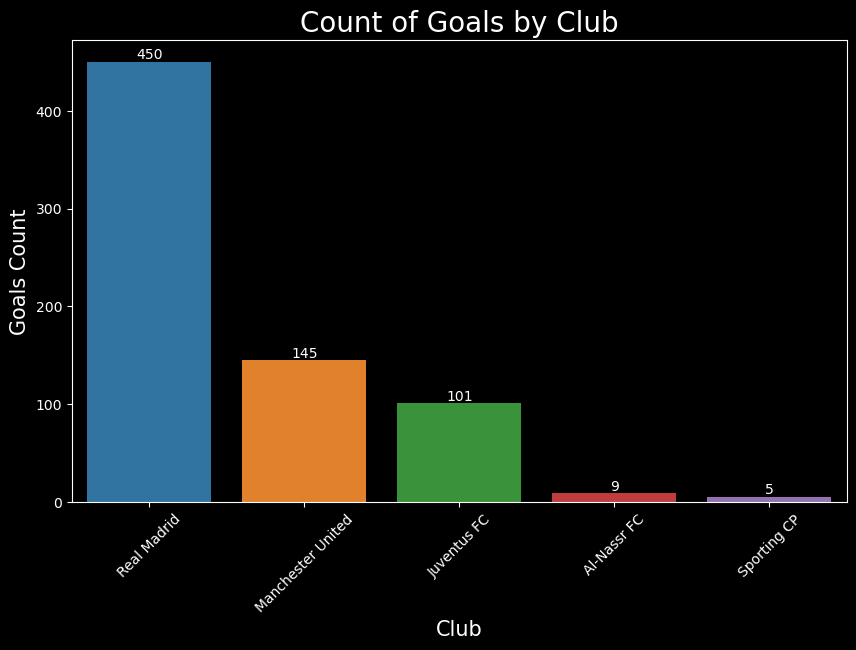

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Club', palette="tab10", order=df['Club'].value_counts().index)
plt.title("Count of Goals by Club", fontsize=20)
plt.xlabel("Club", fontsize=15)
plt.ylabel("Goals Count", fontsize=15)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

Ronaldo has scored most of the goals for Real Madrid

#### Distribution of Playing Positions

(-1.0999986869112157,
 1.0999992162560202,
 -1.0999998800650321,
 1.099998884134535)

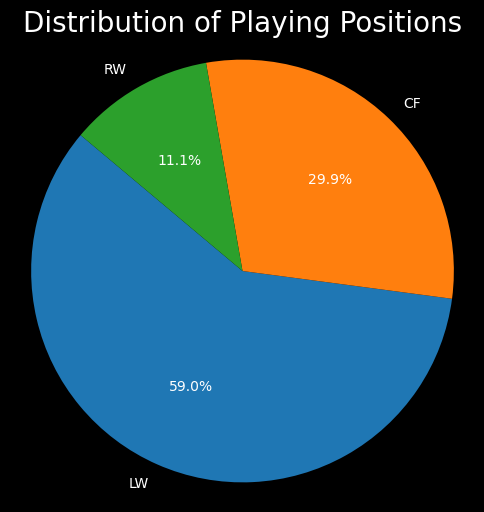

In [62]:
position_counts = df['Playing_Position'].value_counts()

plt.figure(figsize=(6, 6))
plt.title("Distribution of Playing Positions", fontsize=20)
sns.set_palette("viridis")
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.axis('equal') 

Ronaldo ha played majority of the matches in LW position

#### Count of Goals by Club and Playing Position

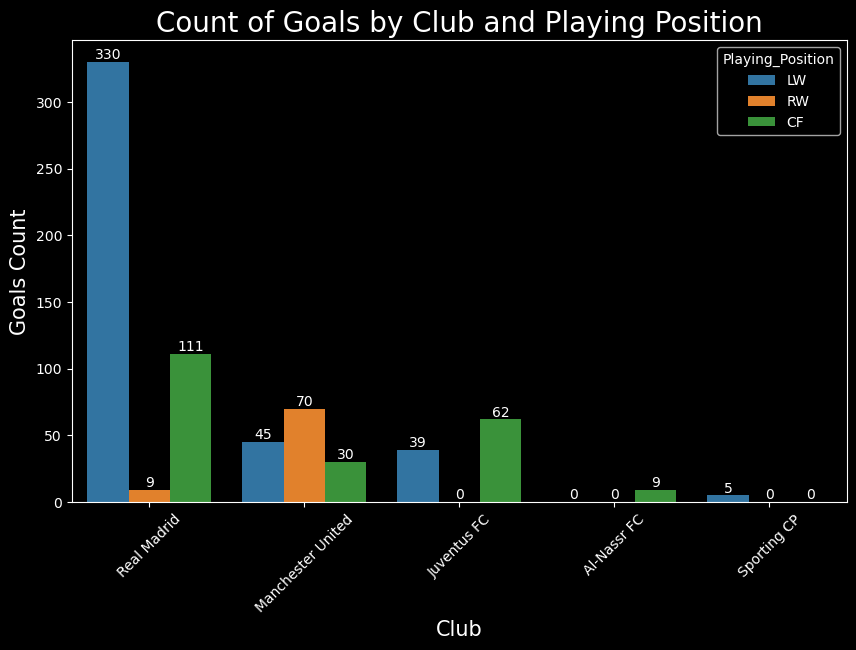

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Club', hue='Playing_Position', palette="tab10", order=df['Club'].value_counts().index)
plt.title("Count of Goals by Club and Playing Position", fontsize=20)
plt.xlabel("Club", fontsize=15)
plt.ylabel("Goals Count", fontsize=15)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

Ronaldo had a playing position LW for most of the time while playing for read Madrid

#### Distribution of Goals by Minute

In [64]:
fig = px.histogram(df, x='Cleaned_Minute', nbins=20, title="Distribution of Goals by Minute")
fig.update_layout(xaxis_title="Minute", yaxis_title="Count")

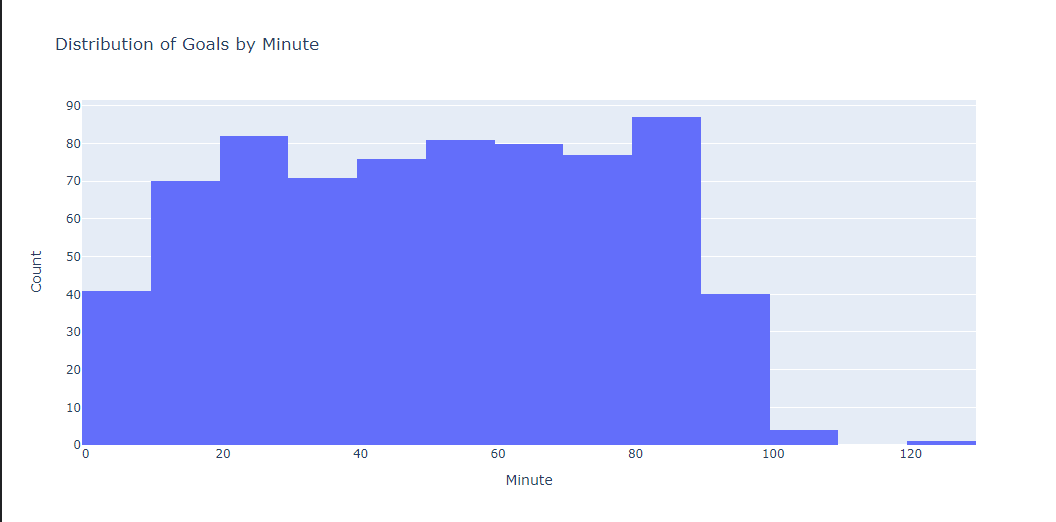

Ronaldo has very good record of scoring goals in 10-90 minutes

#### Count of Goals by Type

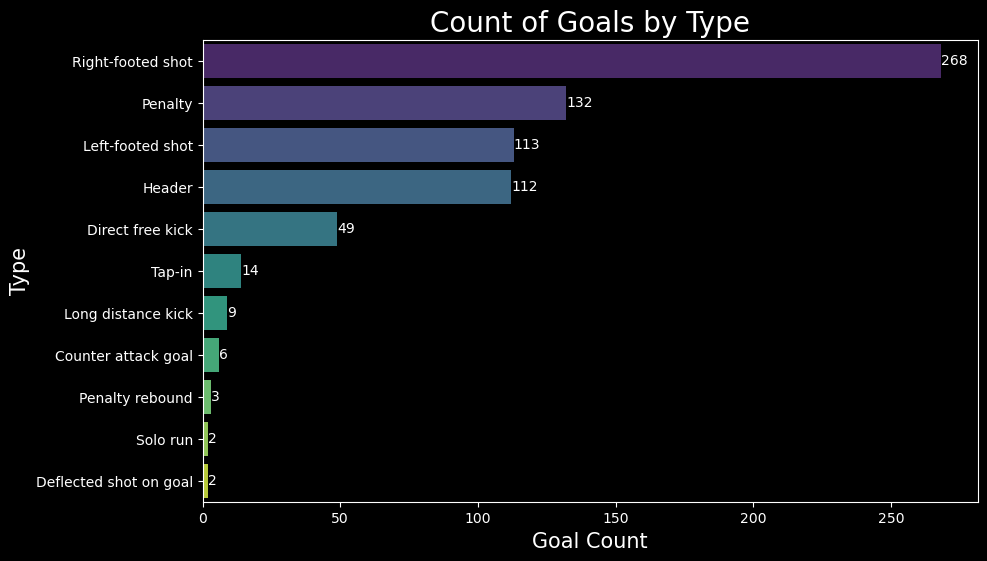

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='Type', palette="viridis", order=df['Type'].value_counts().index)
plt.title("Count of Goals by Type", fontsize=20)
plt.ylabel("Type", fontsize=15)
plt.xlabel("Goal Count", fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars)

Ronaldo likes to score a goal in Right-footed shot

####  Win Distribution

(-1.099999992773741,
 1.0999999996558925,
 -1.099999813123141,
 1.0999997771265948)

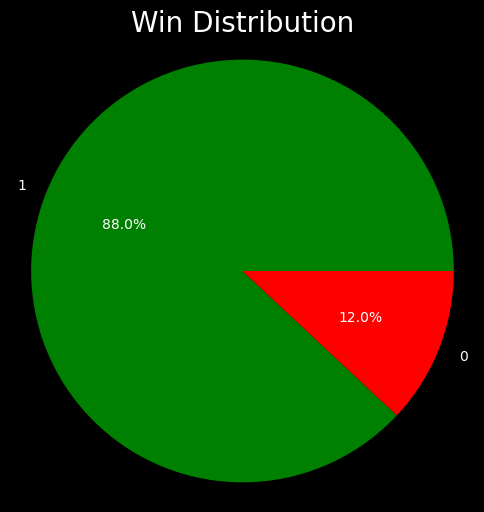

In [66]:
win_df = df.cr7_win.value_counts().reset_index(name='counts')
plt.figure(figsize=(6, 6))
plt.pie(win_df['counts'], labels=win_df['index'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Win Distribution", fontsize=20)
plt.axis('equal')

Its almost 88% win ratio for this data

#### Number of club wins in away or home matches

In [67]:
club_win_df = df.groupby(['Club','venue_win'])['cr7_win'].sum().reset_index(name='counts')
fig = px.funnel(club_win_df,x='counts',y='Club',hover_name='Club',template='plotly_dark',color='venue_win',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text="Number of club wins in away or home matches",title_x=0.5)

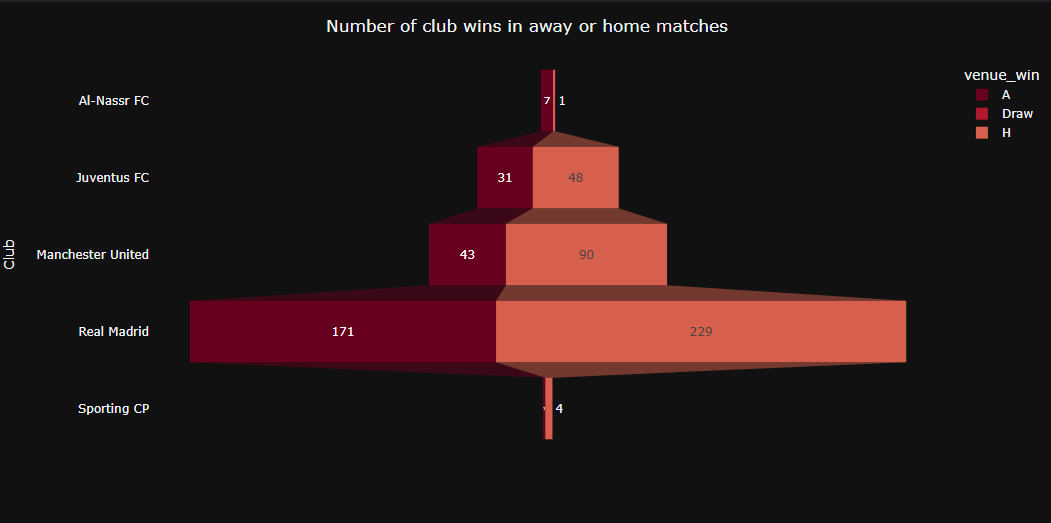

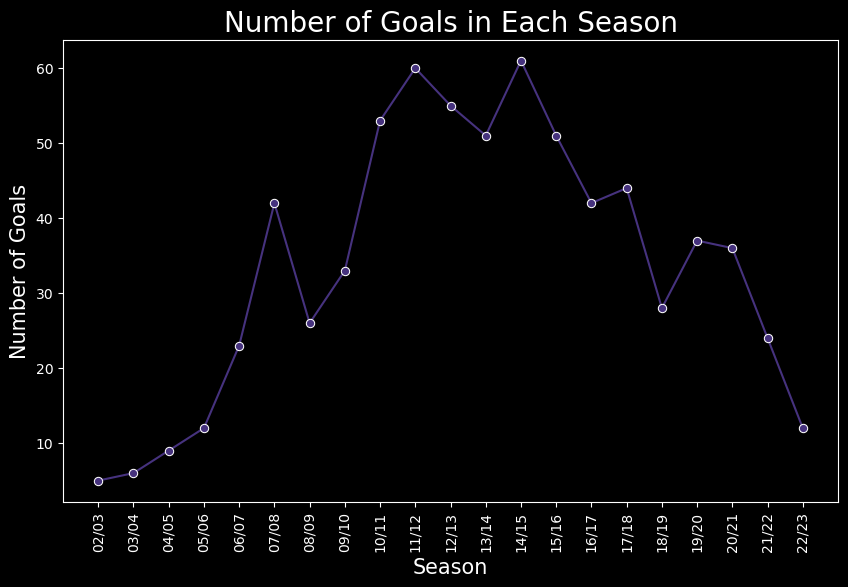

In [68]:
cr7_goals_df = df.groupby('Season').size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
ax = sns.lineplot(cr7_goals_df,x='Season',y='counts', marker='o')
plt.title("Number of Goals in Each Season", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Number of Goals", fontsize=15)
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

10/11 to 15/16 these 7 season were the golden phase for Ronaldo

### Insights
* The data suggests that Ronaldo has scored more goals while playing in LaLiga compared to other competitions.
* The data indicates that Ronaldo's goal-scoring performance is relatively balanced between home and away matches
* The analysis shows that Ronaldo has scored the majority of his goals while playing for Real Madrid, suggesting his significant impact on the team's goal-scoring
* The data indicates that Ronaldo's primary playing position during his time at Real Madrid was Left Winger (LW)
* The analysis suggests that Ronaldo has played the most matches in the Left Winger (LW) position
* The data illustrates that Ronaldo's goal-scoring ability is spread across the majority of the match duration, with a focus on the 10th to 90th minutes
* The data indicates that Ronaldo's preferred method of scoring goals is through Right-footed shots
* The data highlights that Ronaldo has been part of matches with a high win ratio, suggesting his contribution to his team's success
* The analysis reveals that the seasons from 2010/11 to 2015/16 were particularly successful for Ronaldo in terms of his goal-scoring performance